In [4]:
import data, model, loss, function
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

%load_ext autoreload
%autoreload 2

In [72]:
def show_images(epoch, max_iteration):
    fig = plt.figure(figsize=(21, 7 * max_iteration))
    plot_idx = 0
    for i in range(1, max_iteration + 1):
        content_batch = torch.load("./output/{}_{}_content.pt".format(epoch, i))
        style_batch = torch.load("./output/{}_{}_style.pt".format(epoch, i))
        reconstruction_batch = torch.load("./output/{}_{}_reconstruction.pt".format(epoch, i))

        content_batch = data.vgg_normalization_undo(content_batch.numpy())
        style_batch = data.vgg_normalization_undo(style_batch.numpy())
        reconstruction_batch = data.vgg_normalization_undo(reconstruction_batch.numpy())

        content_batch = np.transpose(content_batch, (0, 2, 3, 1))
        style_batch = np.transpose(style_batch, (0, 2, 3, 1))
        reconstruction_batch = np.transpose(reconstruction_batch, (0, 2, 3, 1))

        fig.add_subplot(max_iteration, 3, plot_idx + 1)
        plt.imshow(content_batch[0])

        fig.add_subplot(max_iteration, 3, plot_idx + 2)
        plt.imshow(style_batch[0])

        fig.add_subplot(max_iteration, 3, plot_idx + 3)
        plt.imshow(reconstruction_batch[0])
        
        plot_idx += 3
    plt.savefig(f"./output/validation.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


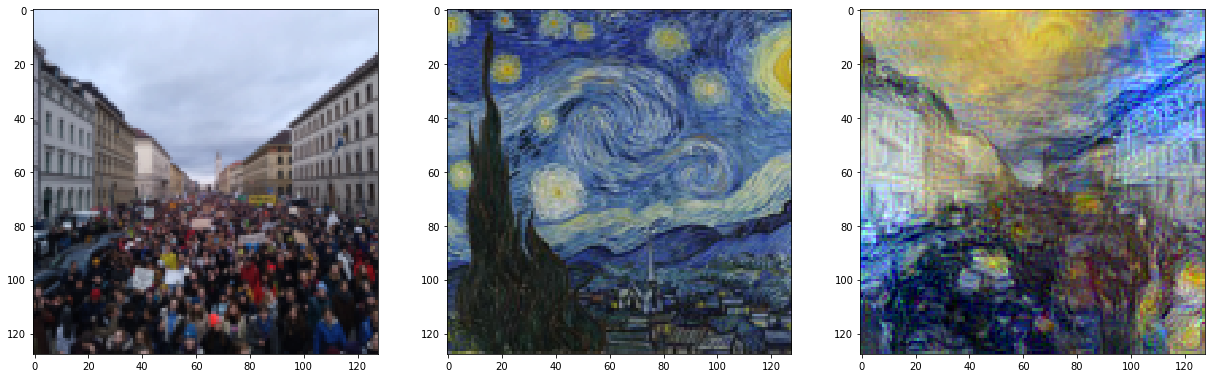

In [87]:
show_images(4001, 1)

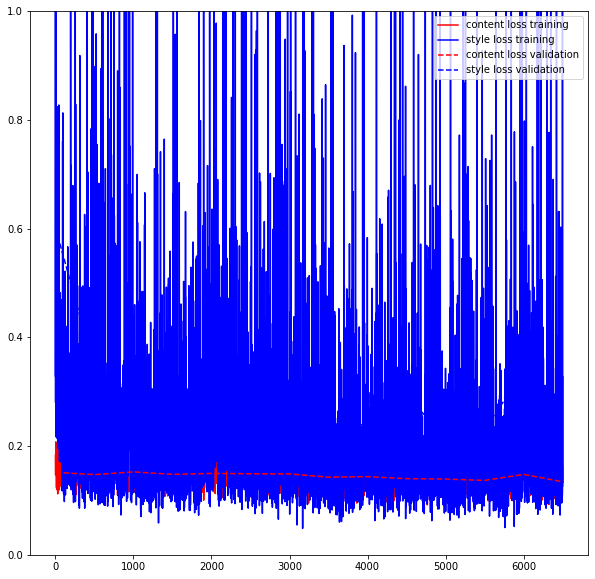

In [81]:
content_loss_history_train = torch.load("output/content_loss_history_train.pt")
style_loss_history_train = torch.load("output/style_loss_history_train.pt")
content_loss_history_val = torch.load("output/content_loss_history_val.pt")
style_loss_history_val = torch.load("output/style_loss_history_val.pt")

fig = plt.figure(figsize=(10, 10))

plt.plot(content_loss_history_train, "r", label="content loss training")
plt.plot(style_loss_history_train, "b", label="style loss training")
plt.plot(*zip(*content_loss_history_val), "r--", label="content loss validation")
plt.plot(*zip(*style_loss_history_val), "b--", label="style loss validation")

plt.ylim(0, 1.0)
plt.legend()

plt.savefig("./output/loss.pdf")

In [56]:
def show_eval_images(eval_iteration):
    content_batch = torch.load("./output/eval_{}_content.pt".format(eval_iteration))
    style_batch = torch.load("./output/eval_{}_style.pt".format(eval_iteration))
    reconstruction_batch = torch.load("./output/eval_{}_reconstruction.pt".format(eval_iteration))
    
    content_batch = data.vgg_normalization_undo(content_batch.numpy())
    style_batch = data.vgg_normalization_undo(style_batch.numpy())
    reconstruction_batch = data.vgg_normalization_undo(reconstruction_batch.numpy())
    
    content_batch = np.transpose(content_batch, (0, 2, 3, 1))
    style_batch = np.transpose(style_batch, (0, 2, 3, 1))
    reconstruction_batch = np.transpose(reconstruction_batch, (0, 2, 3, 1))
    
    fig = plt.figure(figsize=(21, 7))
    
    fig.add_subplot(1, 3, 1)
    plt.imshow(content_batch[0])
    
    fig.add_subplot(1, 3, 2)
    plt.imshow(style_batch[0])
    
    fig.add_subplot(1, 3, 3)
    plt.imshow(reconstruction_batch[0])
    
    plt.savefig("./output/eval.png")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


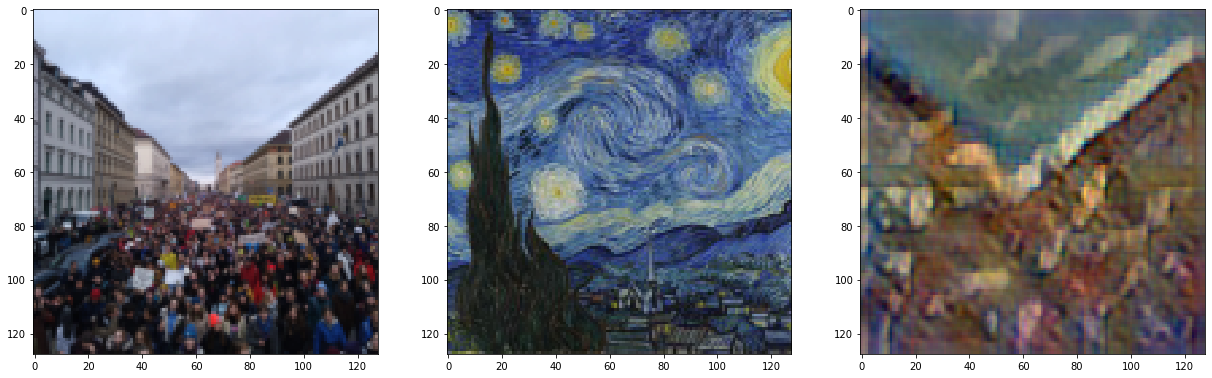

In [57]:
show_eval_images(1)